In [1]:
using Interact
using PGFPlots
using TikzPictures

using AutoRisk
include(joinpath("..", "neural_networks", "neural_network.jl"))

fprop_network (generic function with 1 method)

In [9]:
network_filepath = "../../data/networks/test.weights"

"../../data/networks/test.weights"

In [10]:
network = load_network(network_filepath);

In [11]:
stats = h5open(network_filepath, "r") do file
    read(file, "stats")
end
means, stds = stats["means"], stats["stds"]

([-0.000215436,2.53385e-5,15.989,4.51168,1.90545,0.0,1.49982,1.4994,0.235381,0.177157  …  0.0552702,0.0384559,0.0312803,0.0158217,-0.001006,-0.00151536,0.0181335,-0.0328377,-0.0249452,0.0866965],[0.0382875,0.0116327,3.65371,0.857612,0.400219,1.0,0.0382934,0.0382962,1.18592,14.1563  …  3.75989,2.4152,1.6644,0.819936,0.104511,0.806124,1.59539,2.36763,3.79859,2.81024])

In [15]:
feature_labels_filepath = "../../data/datasets/features.csv"
feature_labels = readtable(feature_labels_filepath)
feature_index_dict = Dict(f=>i for (i,f) in enumerate(feature_labels.columns[1]))
target_labels_filepath = "../../data/datasets/targets.csv"
target_labels = readtable(target_labels_filepath)
target_index_dict = Dict(f=>i for (i,f) in enumerate(target_labels.columns[1]));

In [16]:
function normalize_input(input::Array{Float64}, means::Array{Float64}, stds::Array{Float64})
    return (input .- means) ./ stds
end

normalize_input (generic function with 1 method)

Interact.Options{:ToggleButtons,String}(Signal{String}(UNKNOWN, nactions=1),"f1","UNKNOWN","UNKNOWN",Interact.OptionDict(DataStructures.OrderedDict("UNKNOWN"=>"UNKNOWN","acceleration"=>"acceleration","angular_rate_frenet"=>"angular_rate_frenet","angular_rate_global"=>"angular_rate_global","collision_type"=>"collision_type","ego_lane_advantage_threshold"=>"ego_lane_advantage_threshold","ego_lane_politeness"=>"ego_lane_politeness","ego_lane_safe_decel"=>"ego_lane_safe_decel","ego_lateral_derivative_const"=>"ego_lateral_derivative_const","ego_lateral_proportional_const"=>"ego_lateral_proportional_const"…),Dict("ego_longitudinal_comfortable_deceleration"=>"ego_longitudinal_comfortable_deceleration","fore_right_longitudinal_desired_velocity"=>"fore_right_longitudinal_desired_velocity","rear_right_neighbor_acceleration"=>"rear_right_neighbor_acceleration","rear_same_longitudinal_speed_tracking"=>"rear_same_longitudinal_speed_tracking","turn_rate_frenet"=>"turn_rate_frenet","fore_right_lane_safe_decel"=>"fore_right_lane_safe_decel","fore_right_neighbor_acceleration"=>"fore_right_neighbor_acceleration","rear_right_longitudinal_comfortable_deceleration"=>"rear_right_longitudinal_comfortable_deceleration","rear_left_longitudinal_acceleration_exponent"=>"rear_left_longitudinal_acceleration_exponent","fore_fore_lane_neighbor_distance"=>"fore_fore_lane_neighbor_distance"…)),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,String}(Signal{String}(UNKNOWN, nactions=1),"f2","UNKNOWN","UNKNOWN",Interact.OptionDict(DataStructures.OrderedDict("UNKNOWN"=>"UNKNOWN","acceleration"=>"acceleration","angular_rate_frenet"=>"angular_rate_frenet","angular_rate_global"=>"angular_rate_global","collision_type"=>"collision_type","ego_lane_advantage_threshold"=>"ego_lane_advantage_threshold","ego_lane_politeness"=>"ego_lane_politeness","ego_lane_safe_decel"=>"ego_lane_safe_decel","ego_lateral_derivative_const"=>"ego_lateral_derivative_const","ego_lateral_proportional_const"=>"ego_lateral_proportional_const"…),Dict("ego_longitudinal_comfortable_deceleration"=>"ego_longitudinal_comfortable_deceleration","fore_right_longitudinal_desired_velocity"=>"fore_right_longitudinal_desired_velocity","rear_right_neighbor_acceleration"=>"rear_right_neighbor_acceleration","rear_same_longitudinal_speed_tracking"=>"rear_same_longitudinal_speed_tracking","turn_rate_frenet"=>"turn_rate_frenet","fore_right_lane_safe_decel"=>"fore_right_lane_safe_decel","fore_right_neighbor_acceleration"=>"fore_right_neighbor_acceleration","rear_right_longitudinal_comfortable_deceleration"=>"rear_right_longitudinal_comfortable_deceleration","rear_left_longitudinal_acceleration_exponent"=>"rear_left_longitudinal_acceleration_exponent","fore_fore_lane_neighbor_distance"=>"fore_fore_lane_neighbor_distance"…)),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,String}(Signal{String}(rear_end_rear_collision, nactions=1),"t","rear_end_rear_collision","rear_end_rear_collision",Interact.OptionDict(DataStructures.OrderedDict("rear_end_rear_collision"=>"rear_end_rear_collision","rear_end_front_collision"=>"rear_end_front_collision","hard_brake"=>"hard_brake","time_to_collision_conflict"=>"time_to_collision_conflict"),Dict("hard_brake"=>"hard_brake","rear_end_front_collision"=>"rear_end_front_collision","time_to_collision_conflict"=>"time_to_collision_conflict","rear_end_rear_collision"=>"rear_end_rear_collision")),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(10, nactions=1),"nbin",10,"10",Interact.OptionDict(DataStructures.OrderedDict("10"=>10,"50"=>50,"100"=>100),Dict(100=>"100",10=>"10",50=>"50")),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Float64}(Signal{Float64}(0.1, nactions=1),"scale1",0.1,"0.1",Interact.OptionDict(DataStructures.OrderedDict("0.1"=>0.1,"0.5"=>0.5,"1.0"=>1.0,"3.0"=>3.0,"5.0"=>5.0,"10.0"=>10.0),Dict(10.0=>"10.0",0.5=>"0.5",3.0=>"3.0",0.1=>"0.1",5.0=>"5.0",1.0=>"1.0")),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Float64}(Signal{Float64}(0.1, nactions=1),"scale2",0.1,"0.1",Interact.OptionDict(DataStructures.OrderedDict("0.1"=>0.1,"0.5"=>0.5,"1.0"=>1.0,"3.0"=>3.0,"5.0"=>5.0,"10.0"=>10.0),Dict(10.0=>"10.0",0.5=>"0.5",3.0=>"3.0",0.1=>"0.1",5.0=>"5.0",1.0=>"1.0")),Any[],Any[],true,"horizontal")

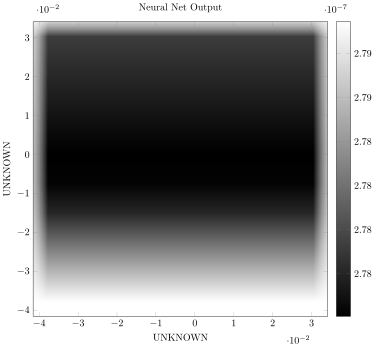

In [17]:
input = reshape(means[:], (1, length(means)))
means = reshape(means, (1, length(means)))
stds = reshape(stds, (1, length(stds)))
@manipulate for 
    f1 in sort(feature_labels.columns[1]),
    f2 in sort(feature_labels.columns[1]),
    t in target_labels.columns[1],
    nbin in [10, 50, 100],
    scale1 in [.1, .5, 1,3,5,10],
    scale2 in [.1, .5, 1,3,5,10]
    
    i, j, k = feature_index_dict[f1], feature_index_dict[f2], target_index_dict[t]
    
    function get_heat(x::Float64, y::Float64)
        input[1, i] = x
        input[1, j] = y
        normalized_input = normalize_input(input, means, stds)
        output = fprop_network(network, normalized_input)
        input[1, i] = means[1, i]
        input[1, j] = means[1, j]
        return output[k]
    end
    
    Axis([Plots.Image(get_heat, 
            (means[i] - stds[i] * scale1, means[i] + stds[i] * scale1), 
            (means[j] - stds[j] * scale2, means[j] + stds[j] * scale2), 
        xbins = nbin, ybins = nbin)], 
            width="12cm", 
            height="12cm", 
            xlabel=@sprintf("%s", replace(f1, "_", "-")), 
            ylabel=@sprintf("%s", replace(f2, "_", "-")), 
            title="Neural Net Output")
end